# Lab 7: Supervised Learning - k-Nearest Neighbor (kNN) Algorithm 

In this lab, we will make first steps in doint supervised learning. in particular, we will learn about the k-Nearest Neighbor (kNN) algorithm. kNN uses a simple idea: "you are what your neighbors are". This idea work quite well in data science. In the first part of the lab, we will cover some background needed to understand the kNN algorithm. In the second part, you will be asked to apply your knowledge on another data set. 

## Lab 7.A: kNN Tutorial with Questions (50% of grade)

As usual, let us start by importing the needed libraries. We will continue using the sklearn library, which implements many of the most popular data science algorithms. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Let us load the Iris data set using a sklearn function `load_iris`.

In [3]:
iris = datasets.load_iris()

As you can see from http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html, `iris` is an object with attributes `data` (a 150x4 matrix, where $i$-th row are 4 attributes of the $i$-th flower), `feature_names` (the names of the 4 attributes -- remember that in data science "attribute" and "feature" means the same thing), `target` (a vector of length 150, where $i$-th number is the type of the $i$-th flower -- in data science people often say "label" instead of "target"), `target_names` (these are strings explaining what each of the 3 types of flowers are), and `DESCR` (giving some information about the Iris data set). Let us list them all 

In [87]:
print(iris.DESCR)
print(iris.data)
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

So, we can see that the attributes of the second flower are `[4.9, 3.0, 1.4, 0.2]`, which means its `sepal_length` is 4.9 cm, `sepal_width` is 3.0 cm, `petal_length` is 1.4 cm, and `petal_width` is 0.2 cm. We will write it matematically as $x_2 = [x_{21}, x_{22}, x_{23}, x_{24}] = [4.9, 3.0, 1.4, 0.2]$. We see that its `target` is 0, which means the type of this iris is `setosa`. We will write it matematically as $y_2 = 0$. All this information was obtained by real botanists who studied iris flowers trying to understand the physical measurements that discriminate between the 3 different types of those flowers.

In data science, people like to denote this data set as $D_{Iris} = \{(x_i, y_i), i = 1, 2 ... 150\}$, meaning that data set $D_{Iris}$ is a set of 150 labeled examples $(x_i, y_i)$. An alternative is to write $D_{Iris} = \{X_{Iris}, Y_{Iris}\}$.

### Supervised Learning
Supervised learning is a game with the following objective. You are given the iris data set $D_{Iris}$ where you know 4 attributes and target values for 150 irises and your objective is to come up with a computer program that predicts a type of any iris flower given the values of its 4 attributes. Written in pseudocode, this is what you have to do:

`predictor = create(algorithm_type, D)
y_new = predictor(x_new)`

In the first line, you are running a `create` function that takes as input data set `D` and the name of a supervised learning algorithm `algorithm_type` and produces as an output a computer program `predictor`. In the second line, you are using `predictor` to predict the label (`y_new` value) for a flower whose attributes are given by `x_new`.

### kNN Algorithm
kNN is a popular supervised learning algorithm that allows us to create `predictor`. The idea of kNN is that the label of flower `x_new` depends on labels of flowers in its neighborhood. In particular, kNN finds the distance between `x_new` and every example `x` in data set `D`. Then, it looks at the label `y` of k examples which are the closest to `x_new`. The predicted label `y_new` is obtained as the most common label in the group of the k nearest neighbors.

**Parameter choice**. We need to make a few decisions when running kNN. The most important is the choice of `k`. If `k = 1`, then we are looking only at the hearest neighbor and it might not be a good idea if we are dealing with noisy data. If `k` is very large, then we might be counting far neighbors that might have different properties. Other decisions include the choice of distance metric (Euclidean is the standard one) and the choice whether to weight closer neighbors more than the farther ones.

**Accuracy**. When deciding which parameters to pick or which supervised learning algorithm to use (there are popular algorithms other than kNN), the question is how to measure which choice is better. The answer is to check if `predictor` provides accurate prediction. Given a data set `D`, a typical way to check accuracy is to randomly split `D` into two data sets, `D_train` and `D_test`. Then, `predictor` is created/trained using `D_train` data set and its accuracy is checked using `D_test`. In particular, we use `predictor` to predict label of every example from `D_test` and compare it with the true labels. The percentage of the correct guesses on `D_test` is reported as accuracy of `predictor`.

## kNN Demo
The following piece of code is taken from:
http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py. Let us run it.

<Figure size 432x288 with 0 Axes>

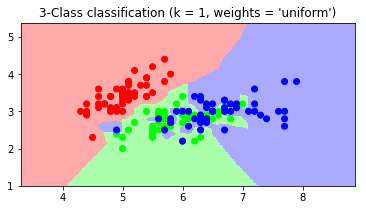

In [8]:
k = 1   # how many nearest neighbors are consulted

X = iris.data[:, [0,1]]  # we only take the first two features. We could
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

The resulting figure shows the predictions of kNN when $k=1$. If `x_new` is in the blue region, the prediction will be the blue class. From this picture, we can observe a small blue blobs inside the predominantly gray area. This is because the nearest neighbor in this area is the blue example. 

**Question 1**. Change value of k to 3 and observe if there is any difference. Discuss what you see and why.

<Figure size 432x288 with 0 Axes>

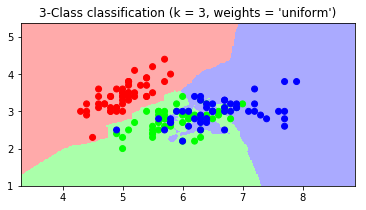

In [9]:
k = 3   # how many nearest neighbors are consulted

X = iris.data[:, [0,1]]  # we only take the first two features. We could
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

<h4>
    <strong>
    It's evident that with k = 3 the boundaries between each class are more clearly defined. So while the color of the points remained the same, it is pretty obvious that the green class has become more clearly defined. This happened because the areas are being decided by the closest three datapoints instead of just it's closest nieghbor when k equals 1. 
    </strong>
</h4>

**Question 2**. Change k to an even higher value, let us say to 25. What do we see now? Discuss.

<Figure size 432x288 with 0 Axes>

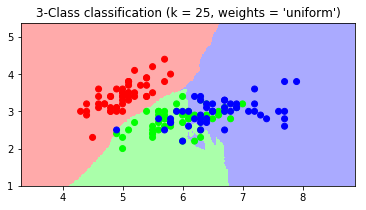

In [10]:
k = 25   # how many nearest neighbors are consulted

X = iris.data[:, [0,1]]  # we only take the first two features. We could
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

<h4>
    <strong>
    Now the classes are much more clearly defined with red gaining more ground from the green class in the left corner of the graph. Red has also given some ground to the blue class in the top-center of the graph. Additionally, the green class as shrunk considerably but that is an indication that it had too much ground when k was lower. Obviously, this is because with 25 nearest neighbor points being considered in the classes are more accurate with this dataset.
    </strong>
</h4>

**Queston 3**. In the line that creates `clf` change weights='uniform' to weights='distance'. Check the documentation or google to understand what it means. Explain. Run the code and discuss if you see any difference.

<Figure size 432x288 with 0 Axes>

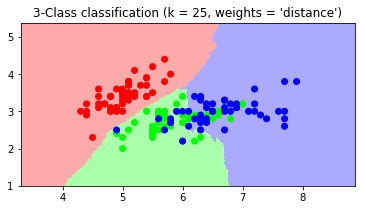

In [11]:
k = 25   # how many nearest neighbors are consulted

X = iris.data[:, [0,1]]  # we only take the first two features. We could
y = iris.target 
#sets y = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
#0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
#1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
#2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
#2 2]

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'distance'))
plt.show()

<h3>
<strong>  
Check the documentation or google to understand what it means. Explain. Run the code and discuss if you see any difference:
    </strong>
</h3>
<strong>
    <p>
        <br>
        If you observe the blue point in the middle of the line between the red and green class, the line is slightly receding, giving ground to the green class. Additionally, the blue line is indicating that it will take some ground from red if we increase k further (I checked this is true). This is happening because 'uniform' sets all points in each neighborhood as weighted equally and 'distance' sets closer neighbors of a query point with greater influence than neighbors which are further away. This would explain the changes in the graph.
    </p>
    </strong>

**Question 4**. Take a look at the code and try to understand what each line of the code does. Explain each line of code.

<Figure size 432x288 with 0 Axes>

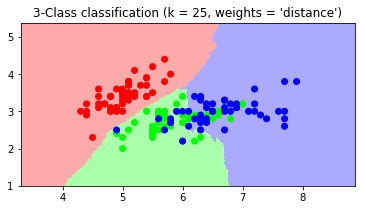

In [5]:
k = 25   # k = 25 means that the 25 closest data points will be consulted

X = iris.data[:, [0,1]]  # X is equal to every row of iris.data but only the first two columns
y = iris.target # y is equal to a matrix containing the type of flower for each row in iris.data

h = .02  # size between the steps in the meshgrid

# Creates color map for the background colors of light red, light green, and light blue/purple
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
# Creates color map for the data point colors of red, green, and blue
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Creates an instance of neighbours classifier to implement the k-nearest neighbors vote.
clf = neighbors.KNeighborsClassifier(k, weights='distance')
#fits the model using X as training data and y as target values
clf.fit(X, y)


#sets the decision boundries for x, 1 smaller than the min value in x and a d 1 bigger than the max value in x
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
#sets the decision boundries for y, 1 smaller than the min value in y and a d 1 bigger than the max value in y
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#returns the points for each x and y point in the meshgrid to xx and yy respectively.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h)) 

#np.c Translates slice objects to concatenation along the second axis.
#and xx.ravel() and yy.ravel() return a contiguous flattened array for xx and yy respectively.
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


#takes xx's shape (which contains the meshgrid) and changes it to match 
#with Z and sets Z to that shape. making Z a scalar 2-D array. 
Z = Z.reshape(xx.shape) 

#creats a plt.figure
plt.figure() 
# changes the size of the figure from the defaults
plt.figure(figsize=(6,3))

#Creates a pseudocolor plot with a non-regular rectangular grid. 
#The coordinates of the quadrilateral corners are recieved from xx and yy
#Z is a scalar 2-D array. The values will be color-mapped with cmap_light.
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plots the training points. y is passed (the given rows flower type). 
#and the color-map is set to the colors designated for the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)

#next 3 lines configure the axes and set a title for the scatter plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'distance'))

#prints plt figure
plt.show()

<strong>
    <h3>
        The answers for question 4 are written as comments in the above code
    </h3>
    </strong>

### Training and testing
  As mentioned above, the typical mechanism for testing accuracy of a `predictor` is to split the data randomly into training and testing, train `predictor` on training data and test its performance on test data. Let us see how it can be done.

In [13]:
#changed '.cross_validation' to '.model_selection' 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

**Question 5**. What is the size of the resulting objects?

In [38]:
print'Size of X_train: ',np.size(X_train)
print'Size of X_test: ',np.size(X_test)
print'Size of y_train: ',np.size(y_train)
print'Size of y_test: ',np.size(y_test)

Size of X_train:  200
Size of X_test:  100
Size of y_train:  100
Size of y_test:  50


Now that we created training and test sets, we can train a kNN classifier using the training data. Before moving forward, let us take a second and take a look at the documentation for kNN implementation in sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

Let us train the kNN predictor:

In [39]:
#from sklearn.neighbors import KNeighborsClassifier
k = 1   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
print(predictor)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


Now that we trained `predictor` we can use it to provide predictions on any example `x`. 

In [40]:
# select the first 4 test examples
i = [0,1,2,3]
x = X_test[i,:]
print(x)
# predict its label
yhat = predictor.predict(x)
# compare predicted and true labels
print(np.array(zip(yhat,y_test[i])))

[[4.8 3.4]
 [4.4 3. ]
 [5.6 3. ]
 [5.9 3. ]]
[[0 0]
 [0 0]
 [1 1]
 [1 2]]


**Question 6**. Did your kNN predictor do a good job in predicting labels of the first 4 test examples? 
<h3>
<strong>The predictor did a pretty good job with three out of four predictions being correct.</strong>
</h3>

**Question 7**. Write a piece of code that calculates the accuracy on those 4 test examples (number of correct guesses divided by the total number of guesses

Pay attention that methods in sklearn.neighbors.KNeighborsClassifier allow you to test the accuracy in a faster way (you should not use it to answer Questions 7 and 8):


In [41]:
corrCount = 0.0
totalCount = 0.0
count = 0
for x in yhat:
    if (x == y_test[count]):
        corrCount += 1
    totalCount += 1
    count+=1

acc = float(corrCount / totalCount)
#print(corrCount)
#print(totalCount)
print(acc)       

0.75


**Question 8**. Find the predictions on all test examples in `X_test` and calculate the accuracy using your code from *Question 7*.

Pay attention that methods in sklearn.neighbors.KNeighborsClassifier allow you to test the accuracy in a faster way (you should not use it to answer Questions 7 and 8):

In [42]:
x8 = X_test[:,:]
#print(x8)
# predict its label
yhat8 = predictor.predict(x8)
# compare predicted and true labels
print(np.array(zip(yhat8,y_test[:])))


[[0 0]
 [0 0]
 [1 1]
 [1 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 2]
 [1 1]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 1]
 [2 1]
 [1 2]
 [1 2]
 [2 2]
 [0 0]
 [0 0]
 [2 1]
 [1 2]
 [2 2]
 [1 1]
 [0 0]
 [1 2]
 [2 2]
 [2 2]
 [1 2]
 [1 1]
 [0 0]
 [1 2]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [2 1]
 [2 1]
 [1 2]
 [1 2]
 [2 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]]


In [43]:
corrCount8 = 0.0
totalCount8 = 0.0
for x8 in yhat8:
    if (x8 == y_test[count]):
        corrCount8 += 1
    totalCount8 += 1

acc8 = float(corrCount8 / totalCount8)
#print(corrCount)
#print(totalCount)
print(acc8)  

0.32


In [44]:
#this is nothing, I just wanted to save this code where I could find it
#accuracy = predictor.score(X_test,y_test)
#print(accuracy)

**Question 9**. Train `predictor` using different choices of k. Try $k = 1, 3, 5, 15, 25, 50$. Report the accuracies on the test data (you can use the score method). Which choice of $k$ resulted in the highest accuracy? Comment briefly if the results make sense to you.

In [45]:
#K = 1
#from sklearn.neighbors import KNeighborsClassifier
k = 1   # number of nearest neighbors
predictork1 = neighbors.KNeighborsClassifier(n_neighbors = k)
predictork1.fit(X_train, y_train);
print(predictork1)

xk1 = X_test[:,:]
#print(x8)
# predict its label
yhatk1 = predictork1.predict(xk1)
# compare predicted and true labels
#print(np.array(zip(yhat9,y_test[:])))
accuracyk1 = predictork1.score(X_test,y_test)
print(accuracyk1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')
0.64


In [46]:
#K = 3
#from sklearn.neighbors import KNeighborsClassifier
k = 3   # number of nearest neighbors
predictork3 = neighbors.KNeighborsClassifier(n_neighbors = k)
predictork3.fit(X_train, y_train);
print(predictork3)

xk3 = X_test[:,:]
#print(x8)
# predict its label
yhatk3 = predictork3.predict(xk3)
# compare predicted and true labels
#print(np.array(zip(yhat9,y_test[:])))
accuracyk3 = predictork3.score(X_test,y_test)
print(accuracyk3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
0.68


In [47]:
#K = 5
#from sklearn.neighbors import KNeighborsClassifier
k = 5   # number of nearest neighbors
predictork5 = neighbors.KNeighborsClassifier(n_neighbors = k)
predictork5.fit(X_train, y_train);
print(predictork5)

xk5 = X_test[:,:]
#print(x8)
# predict its label
yhatk5 = predictork5.predict(xk5)
# compare predicted and true labels
#print(np.array(zip(yhat9,y_test[:])))
accuracyk5 = predictork5.score(X_test,y_test)
print(accuracyk5)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
0.68


In [48]:
#K = 15
#from sklearn.neighbors import KNeighborsClassifier
k = 15   # number of nearest neighbors
predictork15 = neighbors.KNeighborsClassifier(n_neighbors = k)
predictork15.fit(X_train, y_train);
print(predictork15)

xk15 = X_test[:,:]
#print(x8)
# predict its label
yhatk15 = predictork15.predict(xk15)
# compare predicted and true labels
#print(np.array(zip(yhat9,y_test[:])))
accuracyk15 = predictork15.score(X_test,y_test)
print(accuracyk15)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')
0.74


In [49]:
#K = 25
#from sklearn.neighbors import KNeighborsClassifier
k = 25   # number of nearest neighbors
predictork25 = neighbors.KNeighborsClassifier(n_neighbors = k)
predictork25.fit(X_train, y_train);
print(predictork25)

xk25 = X_test[:,:]
#print(x8)
# predict its label
yhatk25 = predictork25.predict(xk25)
# compare predicted and true labels
#print(np.array(zip(yhat9,y_test[:])))
accuracyk25 = predictork25.score(X_test,y_test)
print(accuracyk25)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')
0.76


In [50]:
#K = 50
#from sklearn.neighbors import KNeighborsClassifier
k = 50   # number of nearest neighbors
predictork50 = neighbors.KNeighborsClassifier(n_neighbors = k)
predictork50.fit(X_train, y_train);
print(predictork50)

xk50 = X_test[:,:]
#print(x8)
# predict its label
yhatk50 = predictork50.predict(xk50)
# compare predicted and true labels
#print(np.array(zip(yhat9,y_test[:])))
accuracyk50 = predictork50.score(X_test,y_test)
print(accuracyk50)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')
0.7


<h3>
    <strong>
Which choice of 𝑘 resulted in the highest accuracy? Comment briefly if the results make sense to you.
    </strong>
    </h3>
    <strong>
    <br>
    <p>
        k = 25 resulted in the highest accuracy with .76 percent accuracy. The results make sense because in question 3 when k = 25 the breakdown of the classes seemed to be well defined. I tested and found that k = 30 was the best graphical breakdown then, so it makes sense it was the most accurate of the above options.
    </p>
    </strong>

**Question 10**. Other than choice of $k$, `KNeighborsClassifier` allows you to make some other choices. For example, in *Question 3* you saw that you can use a weighted prediction. There are few other options. Study the documentation and summarize in few sentences what other options you have when training the kNN classifier.

<h3>
    <strong>
After reviewing the documentation I found that we are able to select the algorithm used by kNN (i.e. 'ball_tree', 'kd_tree', 'brute', 'auto'). 'auto' seems pretty cool will select the most appropriate algorithm based on the values passed to fit method. further I found we can choose leaf_size for 'ball_tree', 'kd_tree' algorithm. Finally, I discovered that if you use the 'Minkowski' metric then you'll be about to select a p for the Power parameter. 
    </strong>
    </h3>

## Lab 7.B Training kNN classifier on Iris and Newsgroups data
In this part of the lab you will use your knowledge to train and test accuracy of kNN classifiers on Iris and Newsgroups data.

#### Iris Questions
In Lab 7.A you used only the first two attributes of Iris for prediction. You have 2 questions:

**Question Iris 1**. Train kNN classifier on other pair of attributes. Use $k$ of your choice and feel free to keep other choices at their default values. Which pair of attributes results in the highest accuracy?

**Question Iris 2**. Train kNN classifier using all 4 attributes. Report the accuracy on test data set. Play with parameters of kNN to try to find a combination that results in the highest accuracy. Can you find something that works better than $k=3$ and default choices?


In [4]:
#Question Iris 1.
k = 5   # how many nearest neighbors are consulted

X = iris.data[:, [2,3]]  # we only take the last two features
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
xclf = X_test[:,:]
#print(x8)
# predict its label
yhatclf = clf.predict(xclf)
# compare predicted and true labels
#print(np.array(zip(yhat9,y_test[:])))
accuracyclf = clf.score(X_test,y_test)
print(accuracyclf)

0.38


In [53]:
#Question Iris 1.
k = 5   # how many nearest neighbors are consulted

X = iris.data[:, [0,1]]  # we only take the last two features. We could
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [54]:
xclf = X_test[:,:]
#print(x8)
# predict its label
yhatclf = clf.predict(xclf)
# compare predicted and true labels
#print(np.array(zip(yhat9,y_test[:])))
accuracyclf = clf.score(X_test,y_test)
print(accuracyclf)

0.74


<h3>
    <strong>
        Which pair of attributes results in the highest accuracy?
        </strong>
</h3>
<p>
    <strong>
        I left two examples to show two different accuracy ratings with two different column pairs. I tried the other pairs available, i.e. [0,3], [1,2], but [0,1] seems like it gave the highest accuracy for the predictor with 0.74
    </strong>
</p>
    

**Question Iris 2:**

In [55]:
#Question Iris 2: Train kNN classifier using all 4 attributes. 
#Report the accuracy on test data set. Play with parameters of kNN to try to 
#find a combination that results in the highest accuracy. 
#Can you find something that works better than $k=3$ and default choices?
k = 3   # how many nearest neighbors are consulted

X = iris.data[:,:] #get whole iris dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='distance')
clf.fit(X, y)

# predict its label
yhat = clf.predict(X)

# compare predicted and true labels
accuracy = clf.score(X,y)
print(accuracy)


1.0


<strong>
    <h3>
        Currently k=3 and weights='distance' returns a 100 percent accuracy rating so I believe I found something that works better than k=3 and default choices.
    </h3>
    </strong>


#### Newsgroups Questions
In Lab you already got experience working with the newsgroups data. 

**Question News 1**. Since kNN is a relatively slow algorithms, create your data set by picking 1,000 examples randomly. Remember to record both attribute values and labels. Split your data into 66% training and 33% test data sets.

**Question News 2**. Train a kNN classifier ($k=3$ and defaults) on the training data and test its accuracy on test data. Record the computational time needed to run this. Report the accuracy (pay attention there are 4 types of documents).

**Question News 3**. Train a kNN classifier using different values of $k$, hoping to improve accuracy. Try to use some other distance other than Euclidean. For example, cosine distance is know to work better than Eucliedean on text data.

**Question Nesw 4**. Transform the original 100 attributes into 5 attributes using SVD. Train and test the kNN on the transformed data. Report the accuracies. You might be surprised to see that accuracy could go up. Discuss why this might be so.



In [66]:
#Question 1 Newsgroup:

from random import sample
%matplotlib inline

documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
groupnames = np.loadtxt('groupnames.csv', delimiter=",", dtype='str')
newsgroup = np.loadtxt('newsgroup.csv', delimiter=",",dtype='int')

documentsT = np.transpose(documents)

row = np.array(sample(xrange(len(newsgroup)), 1000))

Values = documentsT[row]
print(Values)
print
Labels = newsgroup[row]
print(Labels)
print

Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    Values, Labels, test_size=0.33)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]]

[3 2 4 4 3 2 4 3 3 1 2 1 1 4 2 1 3 2 4 2 3 3 1 4 3 3 3 2 4 2 1 1 1 2 1 3 3
 3 4 1 1 3 4 2 1 3 4 2 3 4 2 2 2 4 4 2 2 3 4 1 2 2 2 3 1 1 1 1 4 1 4 1 4 4
 1 3 4 1 2 2 1 3 2 2 4 3 3 1 4 1 1 1 4 4 3 1 1 4 2 1 3 2 1 4 1 4 4 1 4 2 4
 3 2 1 4 1 1 4 1 3 4 4 4 2 1 4 2 3 4 4 4 4 3 3 1 4 1 4 1 3 3 2 4 1 4 4 4 3
 3 1 2 4 2 1 1 1 1 3 2 2 4 2 1 2 2 3 2 2 4 3 2 1 4 4 4 1 2 4 4 1 1 4 1 1 4
 3 4 2 2 4 3 1 1 4 1 2 4 1 4 1 3 4 1 1 1 2 4 3 4 4 3 1 4 4 1 1 3 1 3 3 2 4
 2 3 4 1 1 4 3 4 2 1 1 2 4 1 3 2 4 4 1 1 3 4 2 4 4 2 1 4 2 1 4 2 4 2 4 3 1
 4 2 2 3 3 4 3 3 3 4 4 4 2 2 4 2 4 3 1 1 1 2 4 1 3 4 2 4 4 4 4 2 1 4 4 2 4
 4 1 1 1 1 1 1 4 4 2 3 4 2 2 1 4 4 1 1 1 3 1 3 4 2 1 2 2 1 1 4 1 3 2 2 1 3
 1 2 4 4 1 2 4 3 4 4 4 3 3 4 2 3 3 4 2 4 4 2 4 1 1 1 3 4 2 3 1 4 4 3 1 1 3
 4 4 2 2 3 2 4 2 2 1 3 1 1 1 3 2 4 1 4 1 4 2 2 1 2 2 2 2 1 3 4 1 1 2 2 2 4
 4 4 1 2 2 2 4 2 1 2 1 1 1 4 2 1 2 1 2 3 3 4 4 2 4 4 4

In [67]:
#Question 2 Newsgroup:

import time
#get start time
start = time.time()

predictor_NG = neighbors.KNeighborsClassifier(n_neighbors = 3)
predictor_NG.fit(Xtrain, Ytrain);

acc_NG_pred = predictor_NG.score(Xtest,Ytest)
print "Acc:", acc_NG_pred

#get end time
end = time.time()

print
print(end-start)

Acc: 0.6454545454545455

0.0329508781433


In [80]:
#Question 3 Newsgroup

predictor_NG = neighbors.KNeighborsClassifier(n_neighbors = 26,weights ='uniform', metric = 'cosine')
predictor_NG.fit(Xtrain, Ytrain);

acc_NG_pred = predictor_NG.score(Xtest,Ytest)
print "Acc:",acc_NG_pred

Acc: 0.7696969696969697


In [82]:
#Question 4 Newsgroup

U,s,V = np.linalg.svd(Values, full_matrices=0)
print U.shape, s.shape, V.shape

Values5 = np.dot(U[:,0:5],np.diag(s)[0:5,0:5])
print Values5.shape

(1000, 100) (100,) (100, 100)
(1000, 5)


In [84]:
Values5_train, Values5_test, Values5_Labels_train, Values5_Labels_test = train_test_split(
    Values5, Labels, test_size=0.33)

predictor_NGQ4 = neighbors.KNeighborsClassifier(n_neighbors =26,weights ='uniform', metric = 'cosine')
predictor_NGQ4.fit(Values5_train, Values5_Labels_train);

acc_NGQ4_pred = predictor_NGQ4.score(Values5_test, Values5_Labels_test)
print "Accuracy:",acc_NGQ4_pred


Accuracy: 0.6636363636363637


<strong>
<h4>
Report the accuracies. You might be surprised to see that accuracy could go up. 
Discuss why this might be so:
    </h4>
        <p>
The accuracy of the predictor in question 4 newsgroup is lower than the accuracy of the predictor in question 3 newsgroup. I was pretty surprised by this because through SVD we should have reduced the "noise" in the data set thereby improving the accuracy. I believe this drop in accuracy took place because the predictor was overfit to the format of the dataset in question 3 newsgroup.  
       </p>
</strong>